# Plant Growth Data Classification

**Plant Growth Data Classification**

**Problem Statement**

Agricultural productivity relies on understanding and managing soil conditions to match the nutrient requirements of specific crops. With varying needs for nitrogen (N), phosphorus (P), and potassium (K), as well as sensitivity to soil temperature and pH levels, it is critical for farmers to determine which crops are most suitable for their soil conditions to optimize yield.

This dataset includes key soil properties—nutrient levels (N, P, K), average soil temperature (°F), and pH (acidity or basicity)—and maps them to specific crop types (e.g., rice, maize, various legumes, fruits, and cash crops like cotton and coffee). Using this data, we aim to develop a predictive model that suggests the most suitable crop types based on given soil characteristics.

**Objective**

To build a machine learning model that recommends the best crop(s) based on soil nutrient levels (N, P, K), temperature, and pH, thereby supporting informed decision-making for farmers and improving agricultural efficiency.

**Goals**

1. **Analyze Soil-Condition Requirements for Different Crops**: Explore the soil nutrient composition, temperature, and pH ranges ideal for each crop in the dataset.

2. **Develop Predictive Model**: Train a classification model that suggests optimal crop choices based on the input conditions of N, P, K levels, temperature, and pH.

3. **Evaluate Model Accuracy**: Assess the model's accuracy in correctly recommending crop types by validating it against test data.
Provide Insights for Crop Rotation or Soil Amendment: Use the model to suggest soil amendments or crop rotation strategies to achieve better suitability for desired crops.


# Importing Libraries and Loading dataset

In [ ]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\HealthCare\\Agreeculture Domain'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Plan_Growth_recommendation.csv")
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
print("Shape of the dataframe :", df.shape)
df.isna().sum()

Shape of the dataframe : (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

# EDA - Exploratory Data Analysis

### sweetviz

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv
report  = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### autoviz

In [ ]:
#!pip install autoviz==0.0.6

Shape of your Data Set: (2200, 8)
Classifying variables in data set...
    8 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10
Could not draw Violin Plot
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 3.910


N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

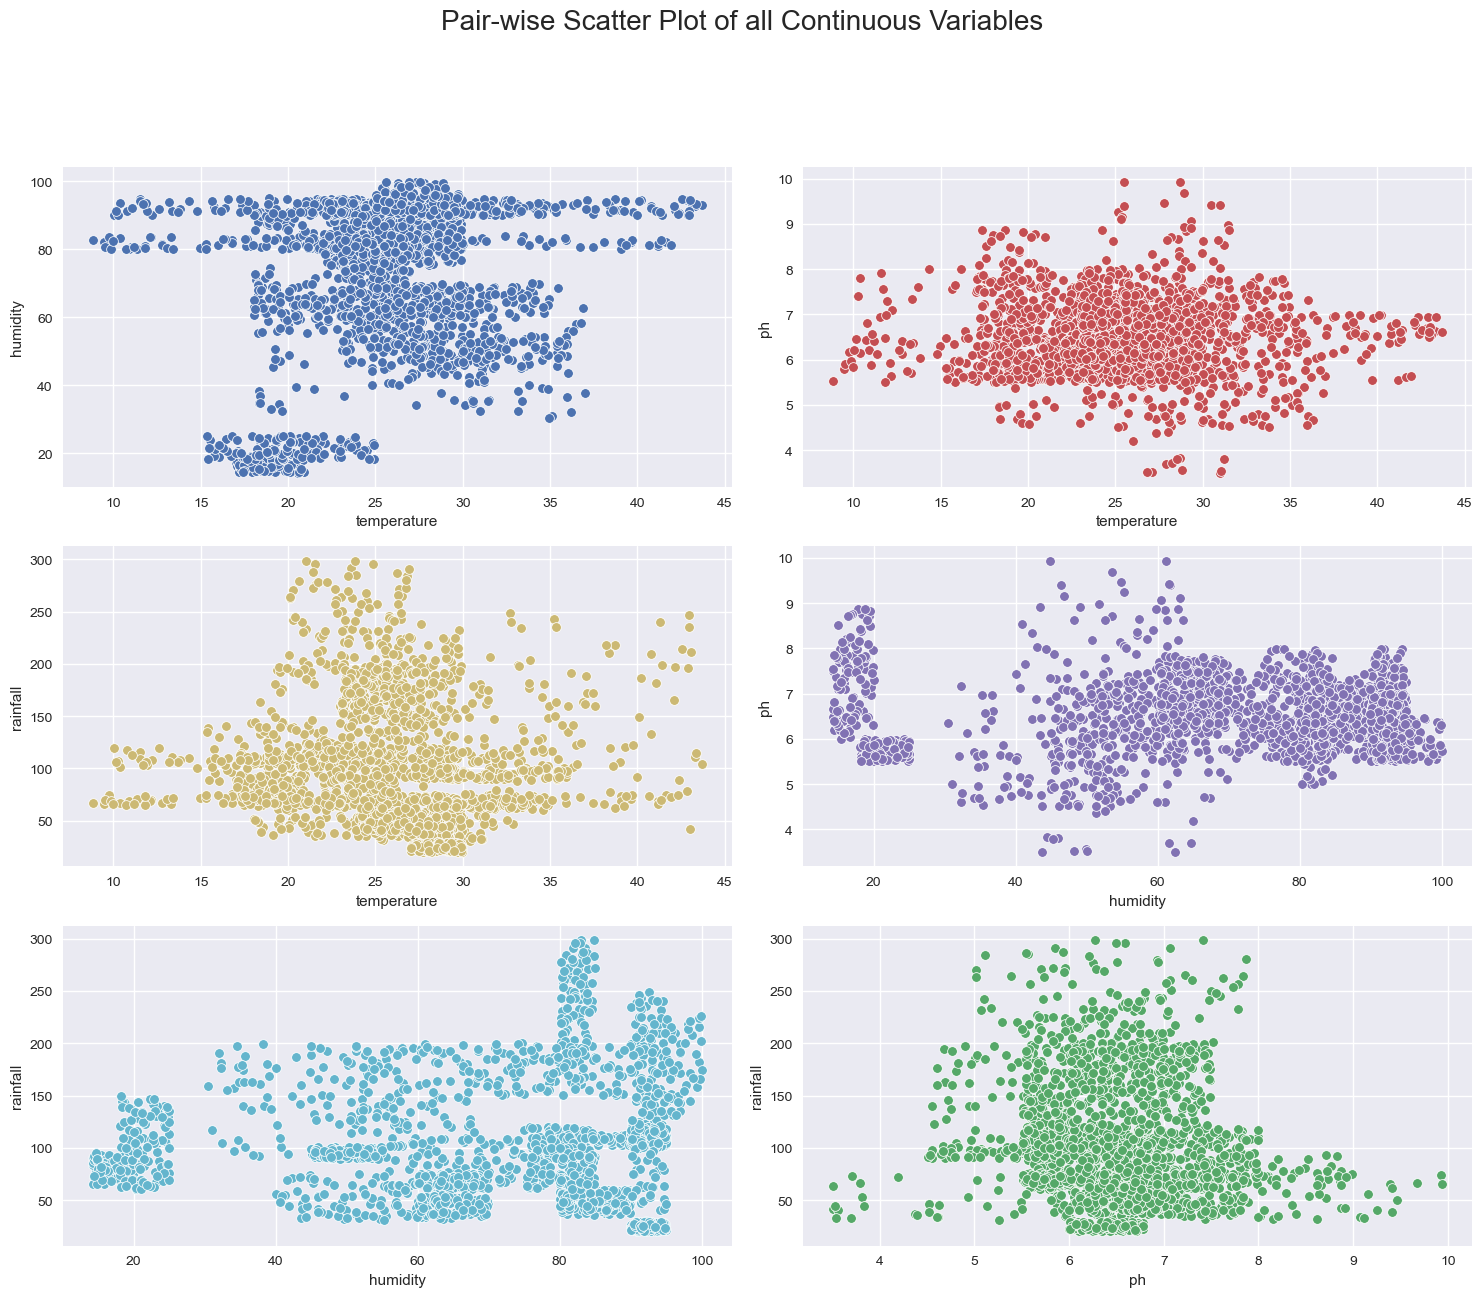

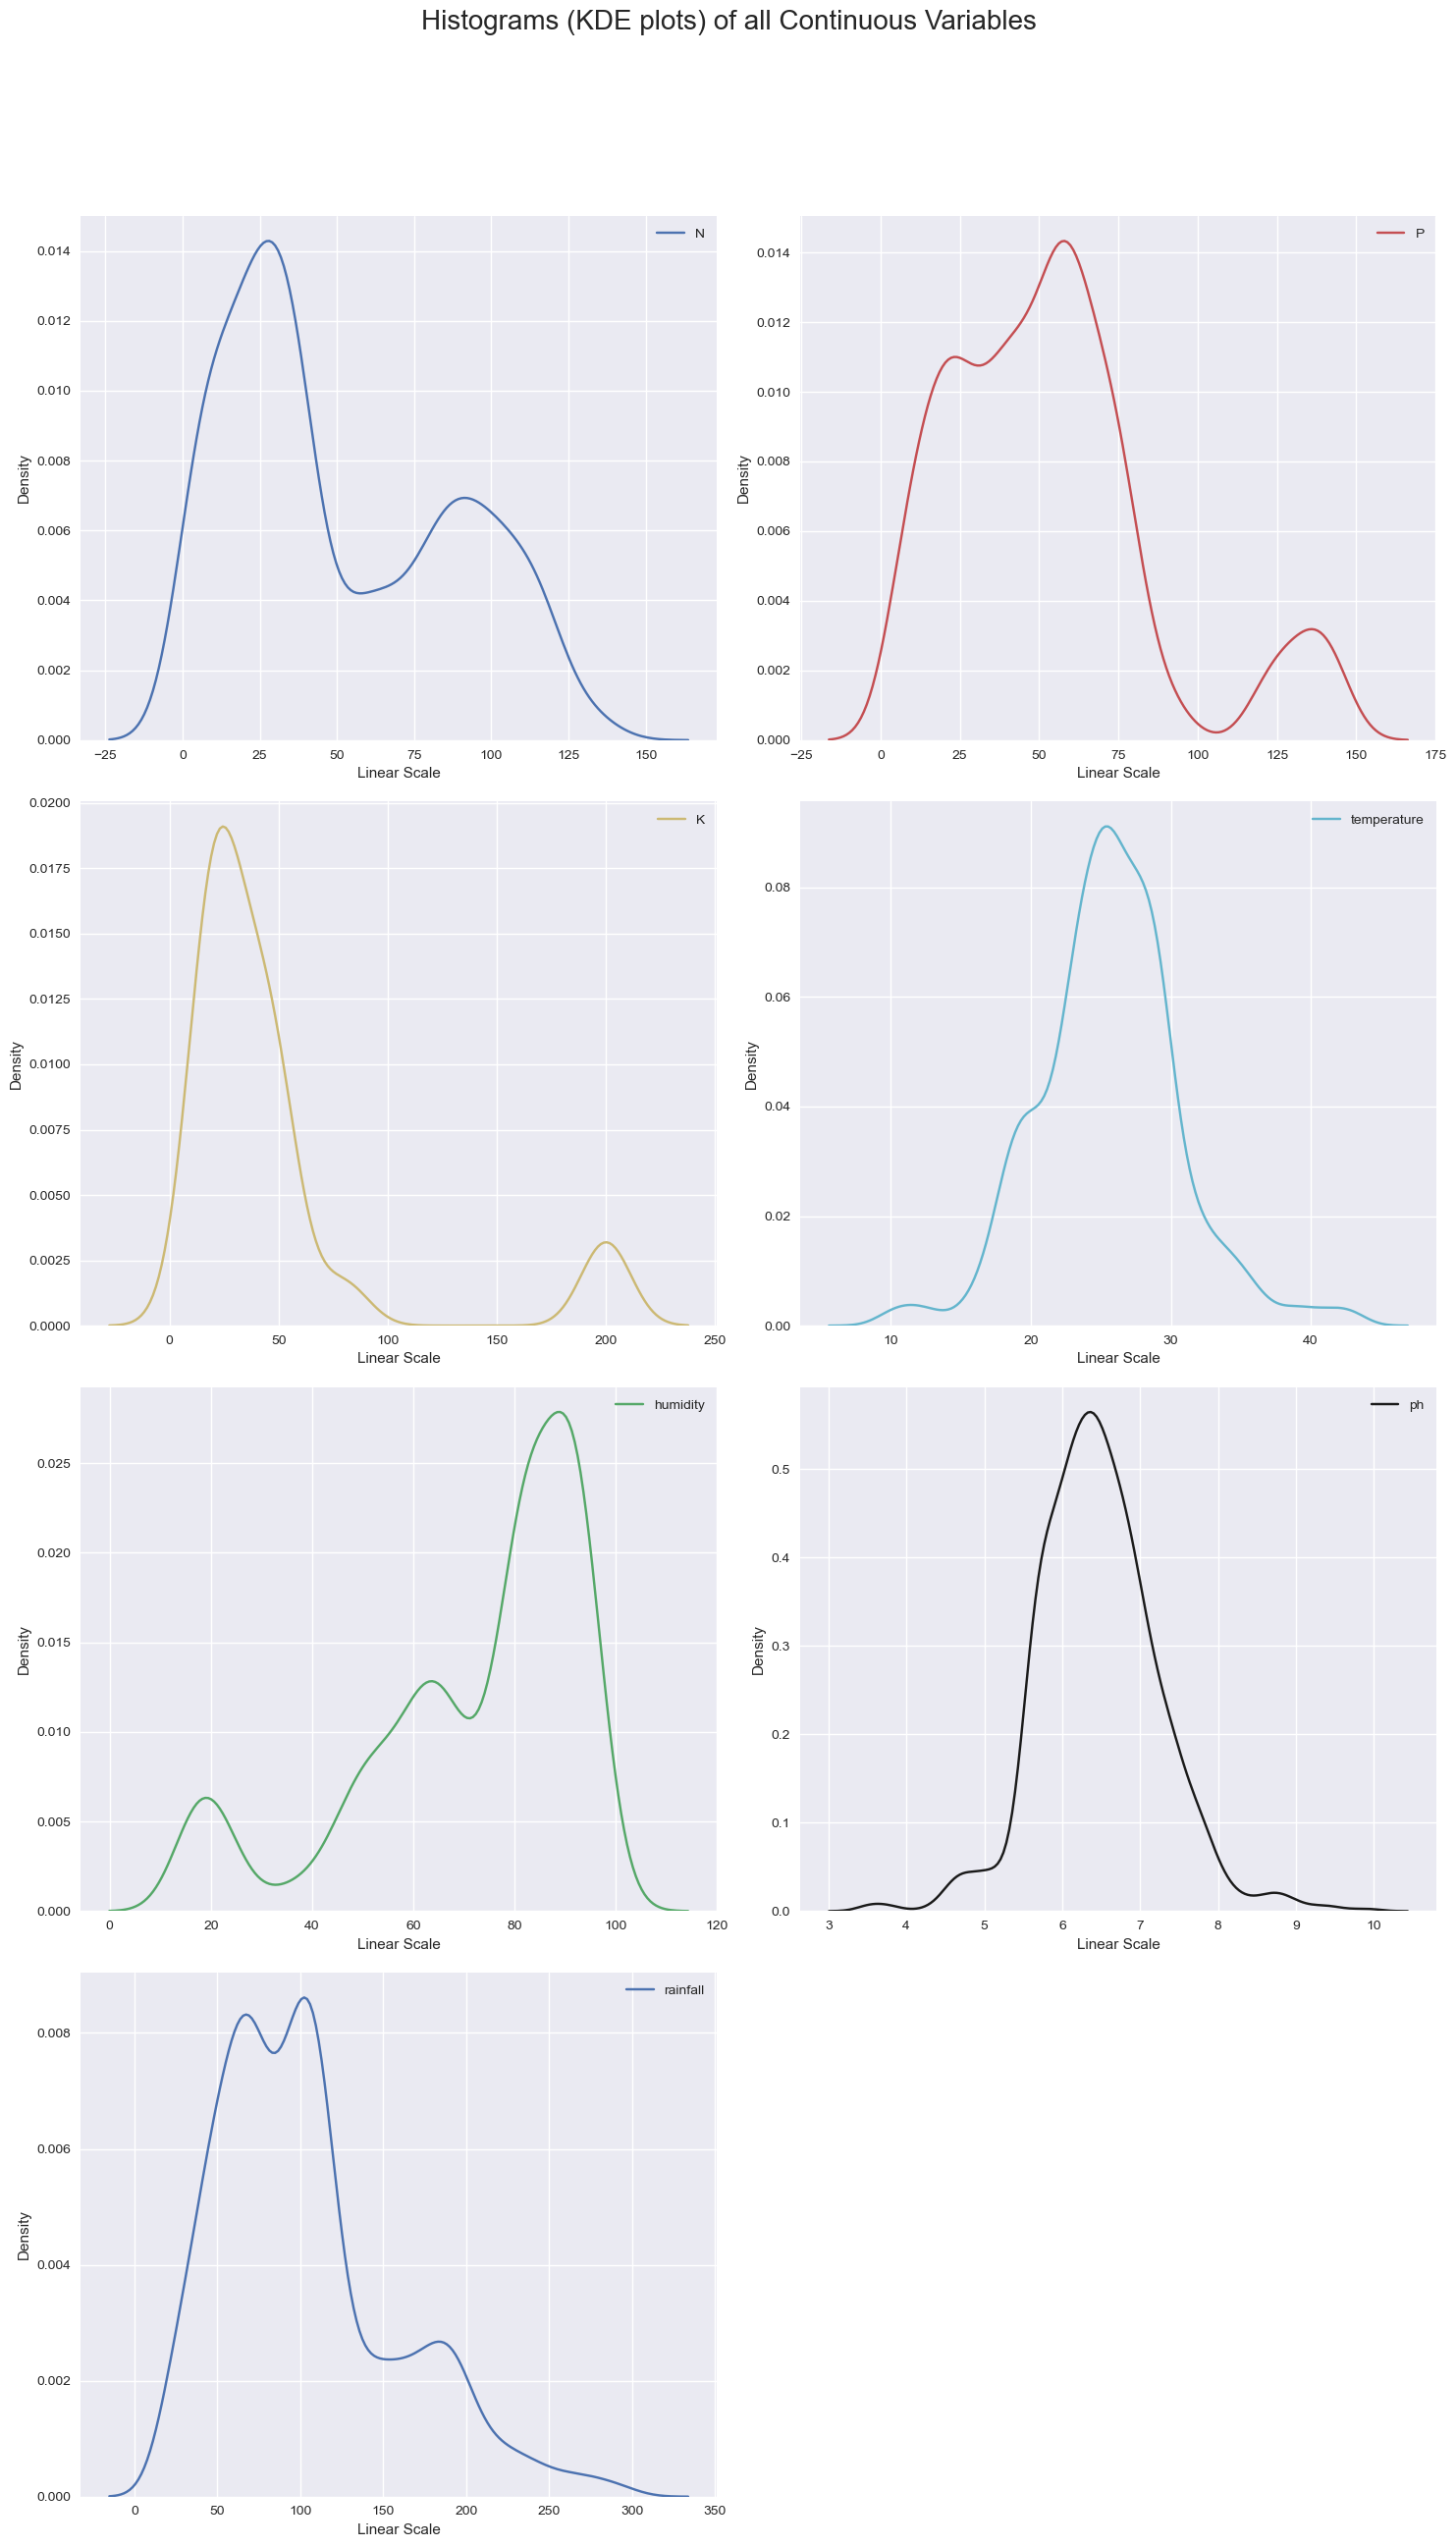

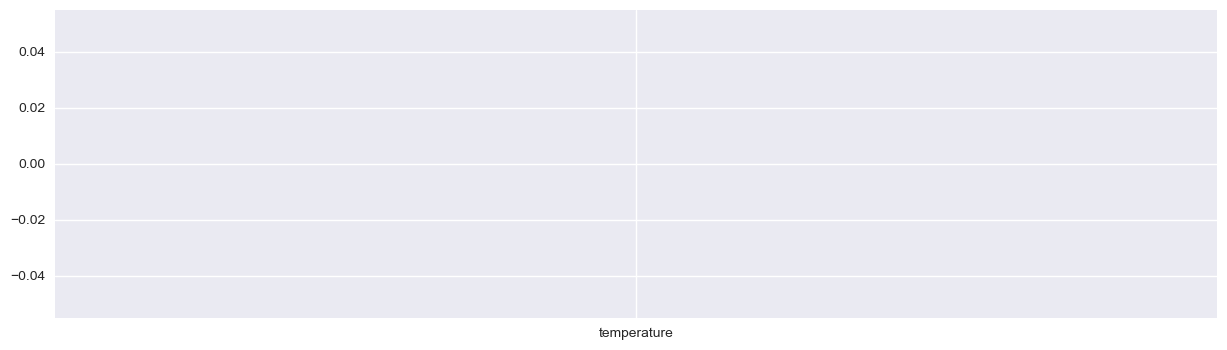

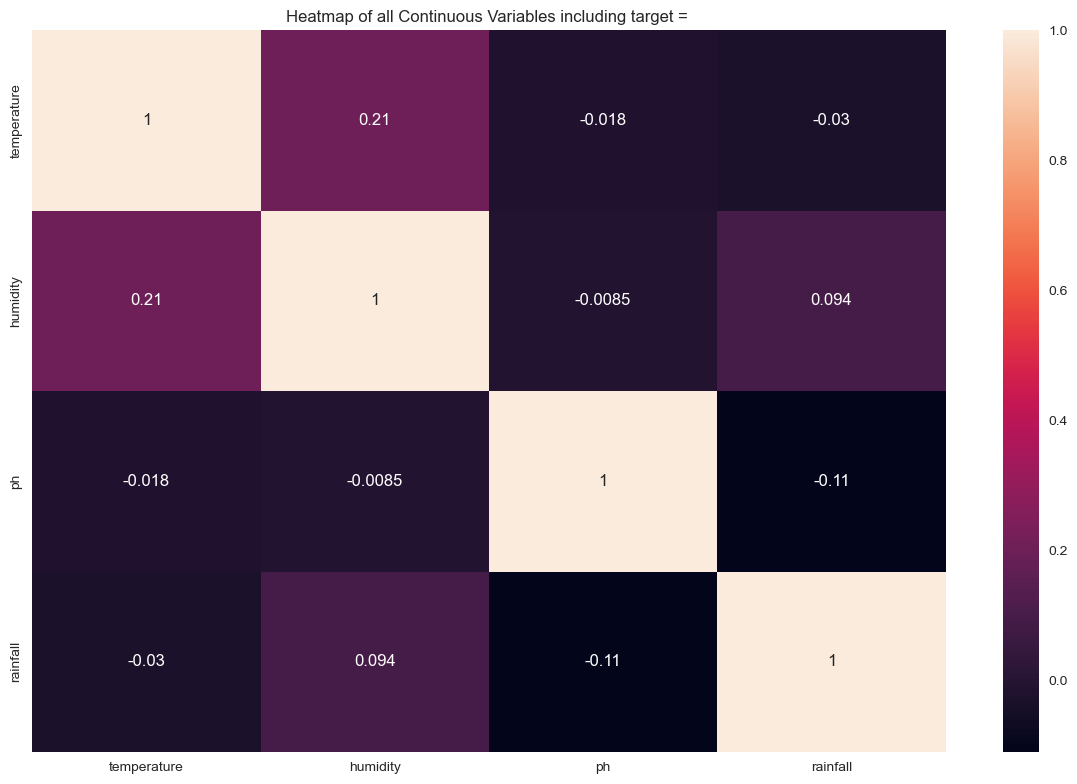

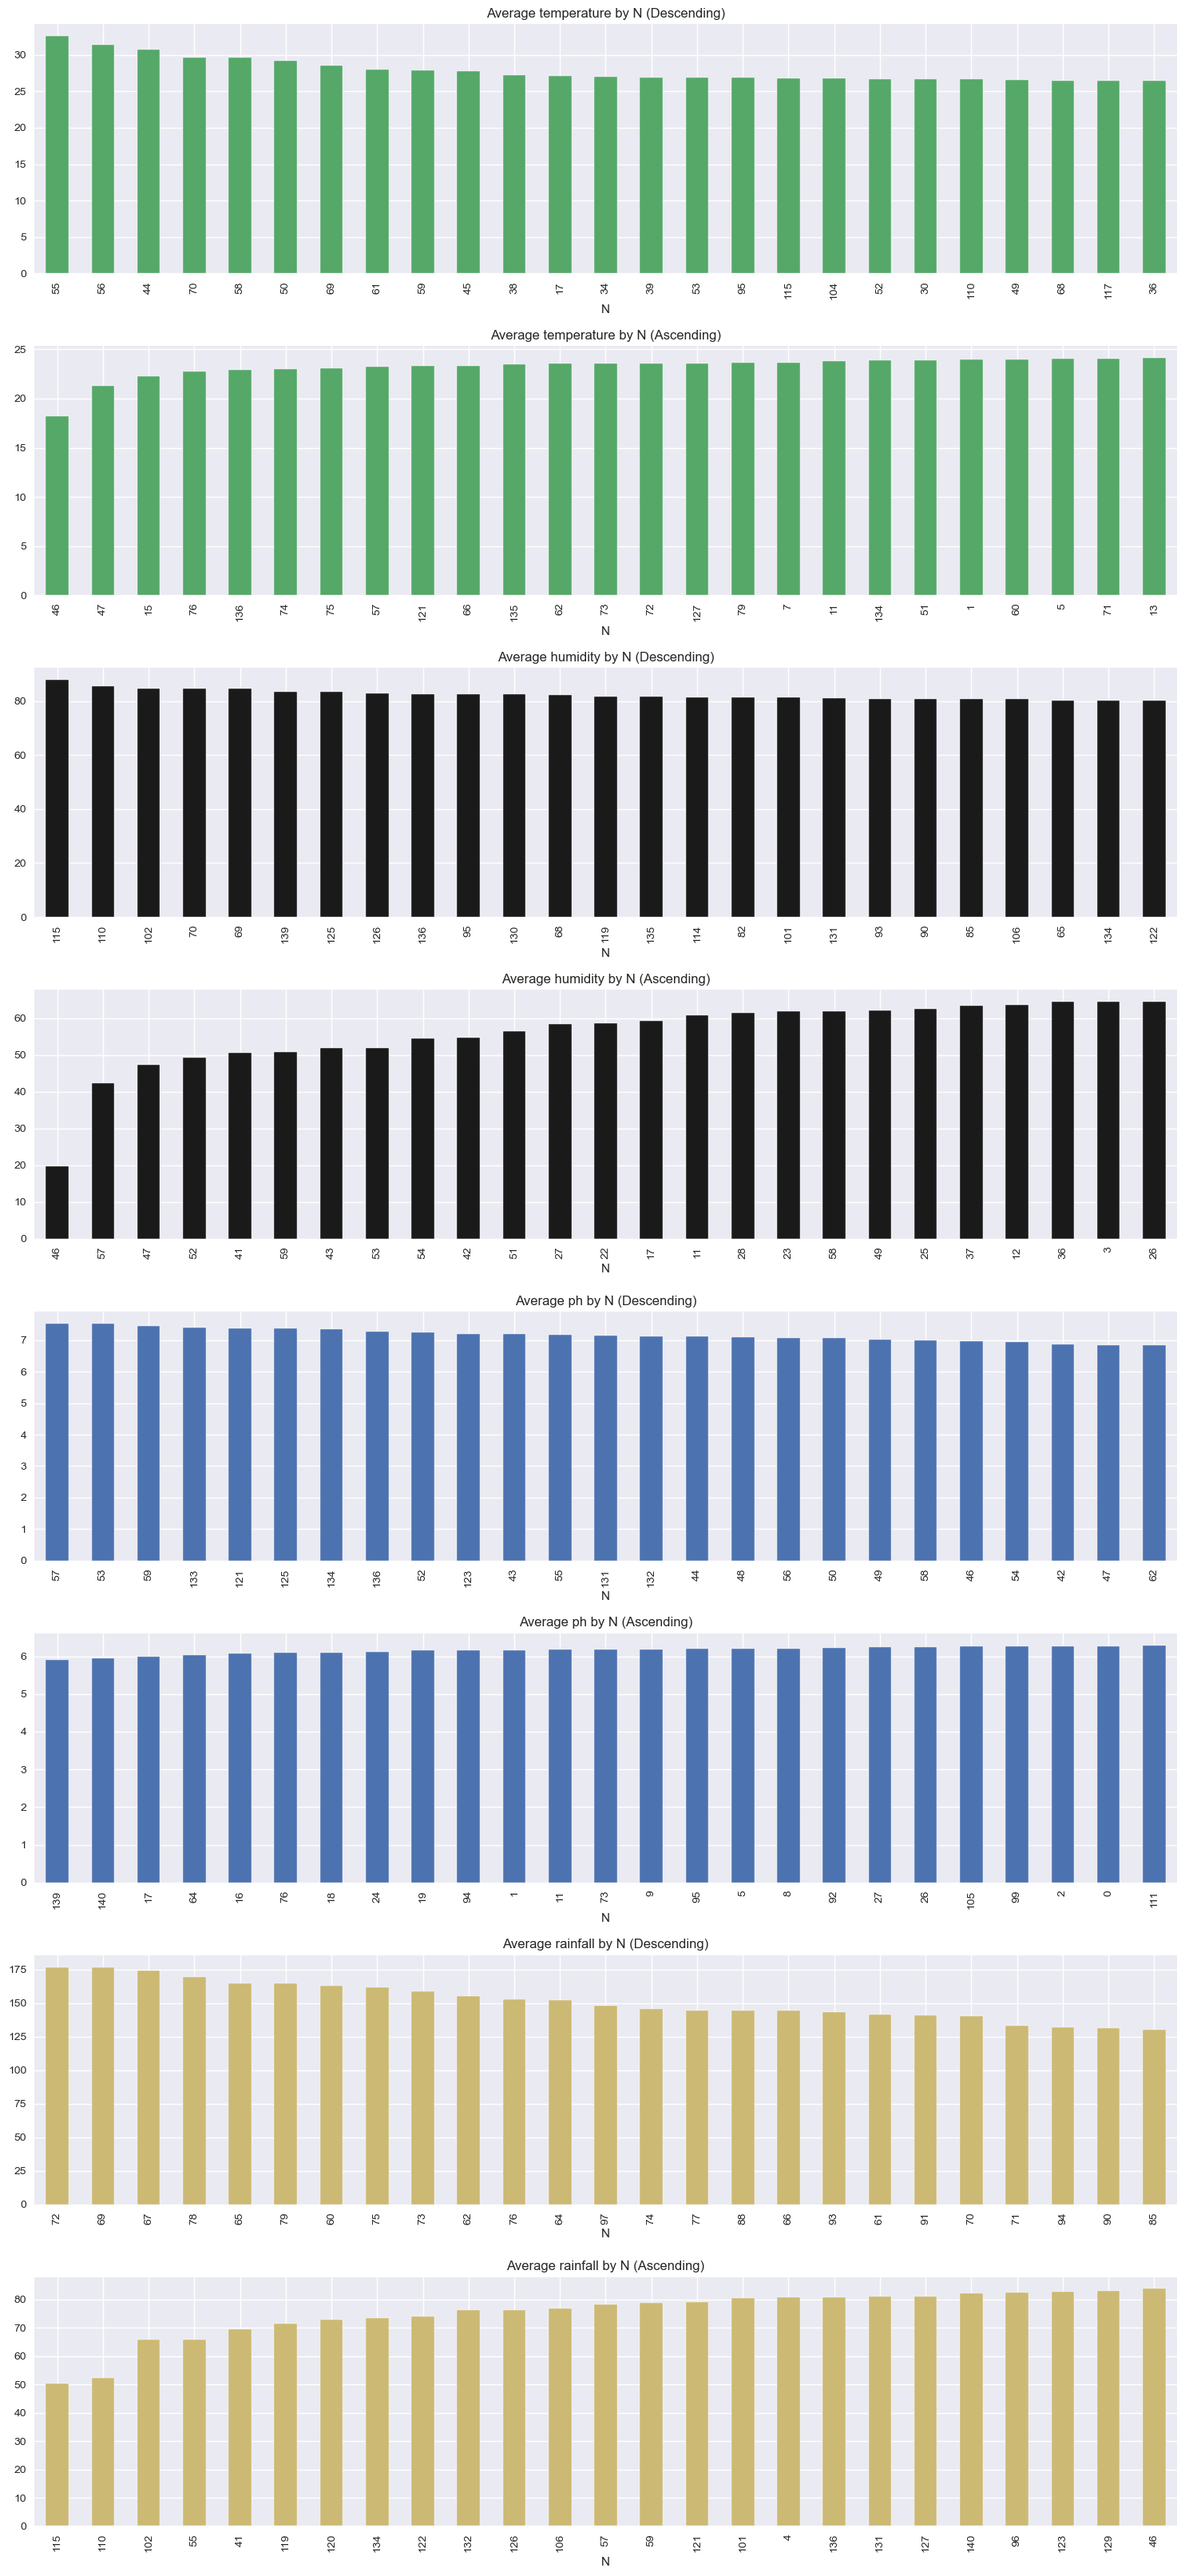

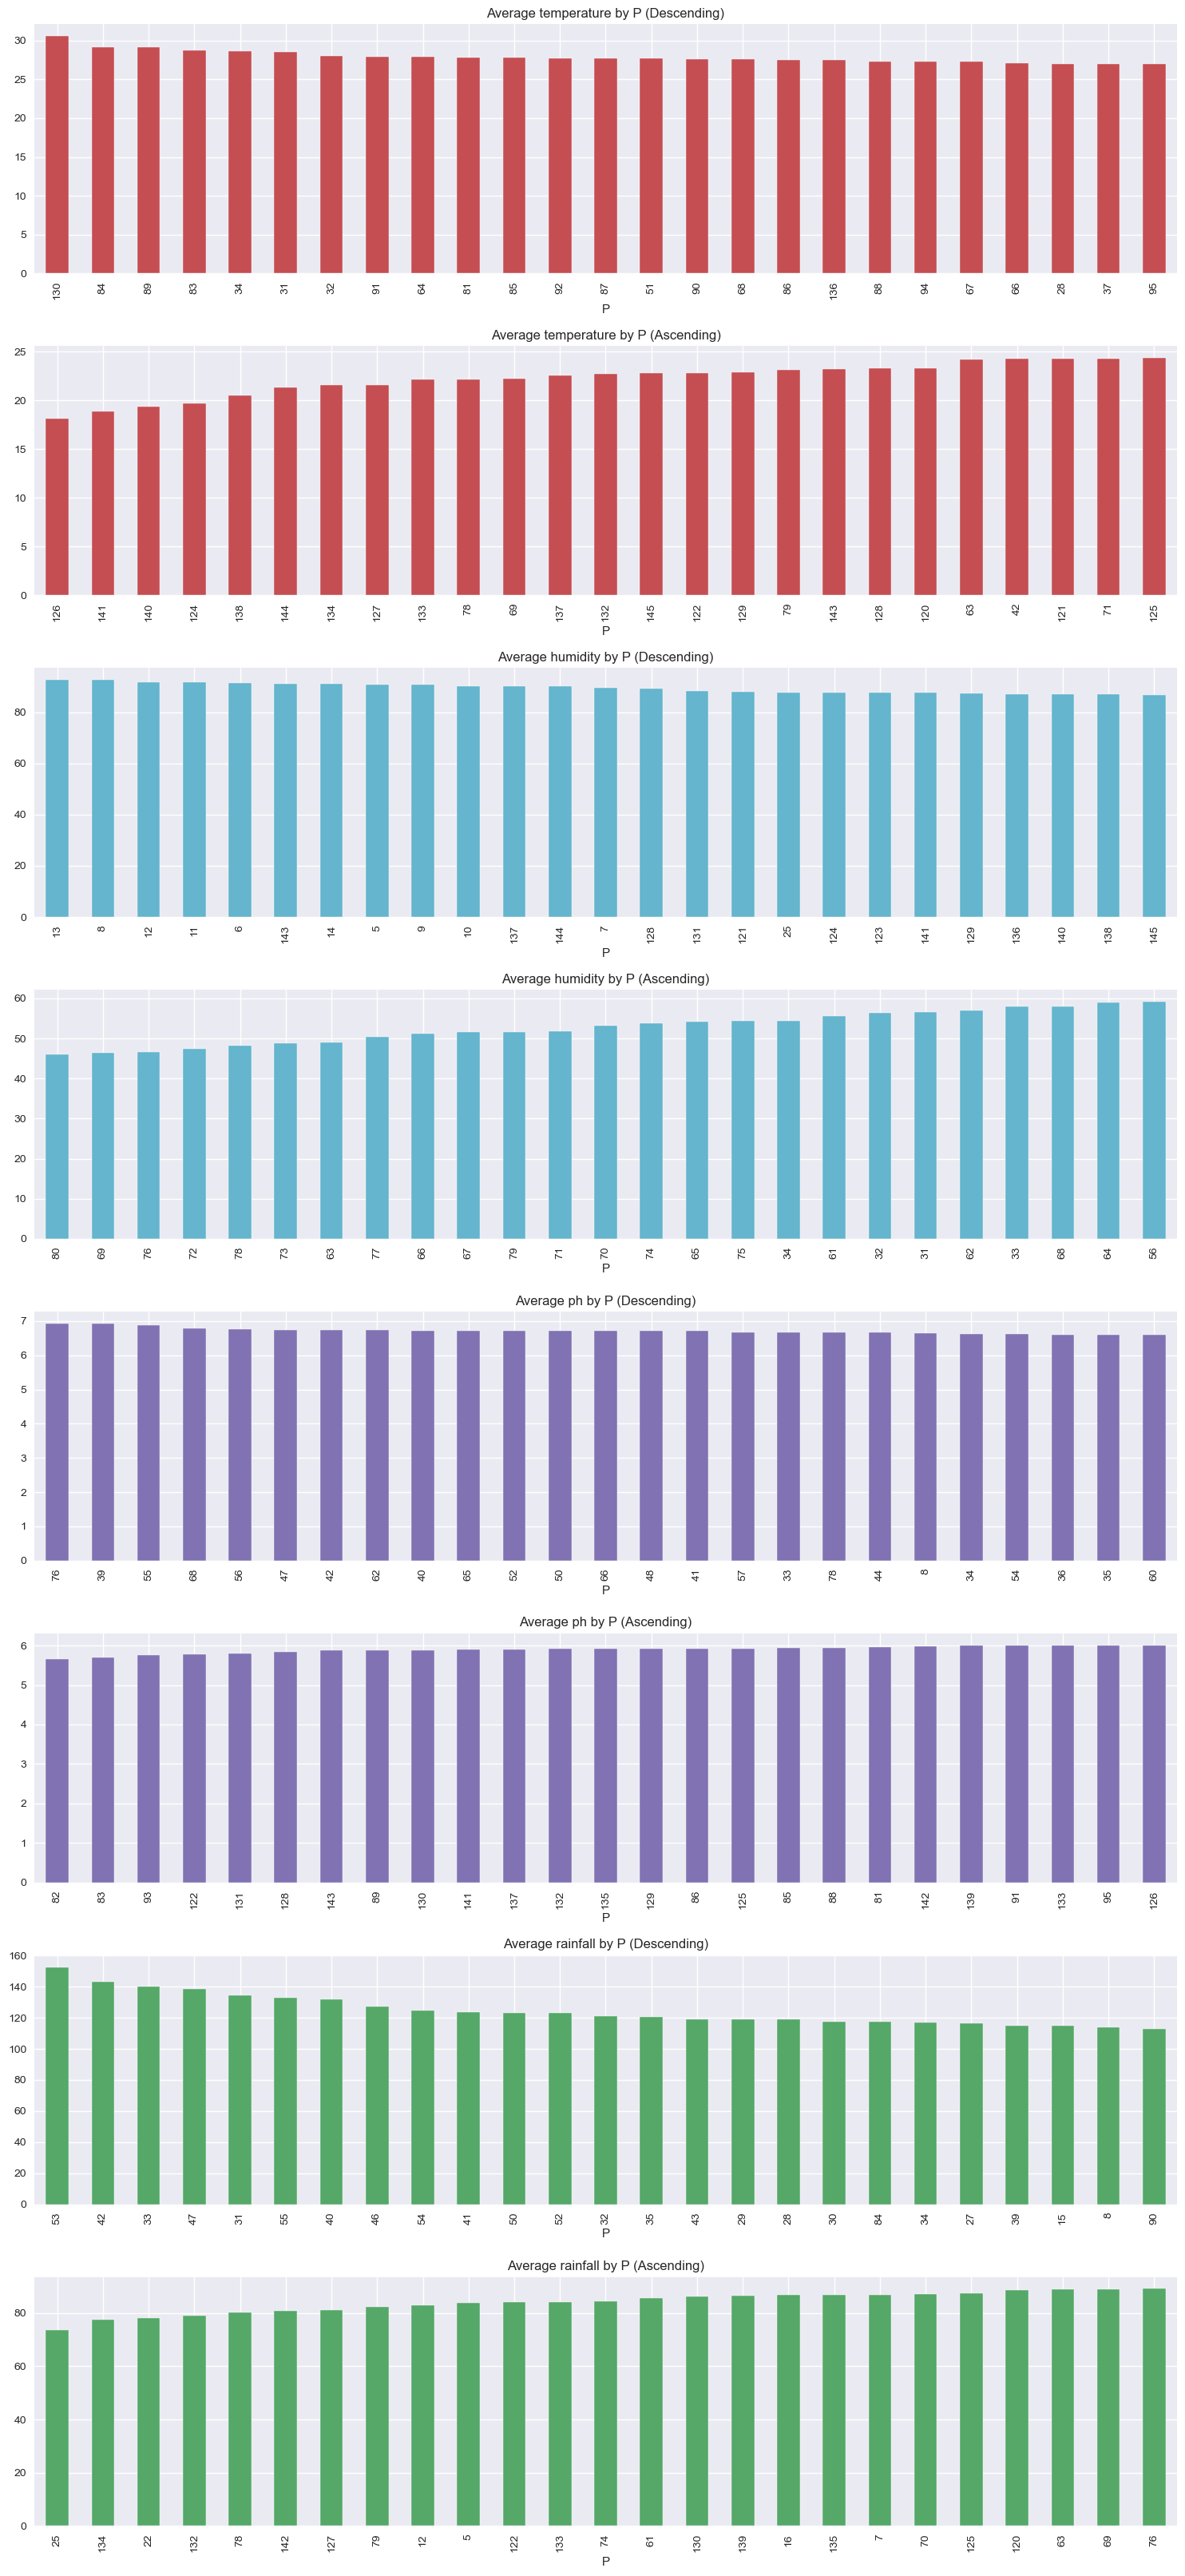

<Figure size 1500x4800 with 0 Axes>

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz = AutoViz_Class()
autoviz.AutoViz(filename = "", dfte=df)

In [ ]:
#!pip install --upgrade autoviz

In [4]:
import autoviz
print(autoviz.__version__)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
0.1.905


In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz = AutoViz_Class()
autoviz.AutoViz(filename = "", dfte=df)

Shape of your Data Set loaded: (2200, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


N    P   K  temperature  humidity      ph      rainfall   label 
0      90  42  43   20.879744   82.002744  6.502985  202.935536    rice
1      85  58  41   21.770462   80.319644  7.038096  226.655537    rice
2      60  55  44   23.004459   82.320763  7.840207  263.964248    rice
3      74  35  40   26.491096   80.158363  6.980401  242.864034    rice
4      78  42  42   20.130175   81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32   26.774637   66.413269  6.780064  177.774507  coffee
2196   99  15  27   27.417112   56.636362  6.086922  127.924610  coffee
2197  118  33  30   24.131797   67.225123  6.362608  173.322839  coffee
2198  117  32  34   26.272418   52.127394  6.758793  127.175293  coffee
2199  104  18  30   23.603016   60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='N', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['N']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('N')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['P']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('P')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['K']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('K')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['temperature']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('temperature')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

# Automation for Model Building

# PYCARET PACKAGE

In [ ]:
#!pip install pycaret

In [3]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data = df.sample(frac=0.8, random_state=42).reset_index(drop=True) # Training data - 80%
data_unseen = df.drop(data.index).reset_index(drop=True) # Test data - 20%

In [5]:
print(data.shape, data_unseen.shape)

(1760, 8) (440, 8)


In [6]:
from pycaret.classification import *

In [7]:
classification_model = setup(data = data, target = 'label', session_id = 123)

In [8]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
# HyperParameters tuning
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predict_model(tuned_rf)

N   P   K  temperature   humidity        ph    rainfall        label  \
1755   74  55  19    18.050337  62.893669  6.288868   84.236137        maize   
1149  102  25  50    28.204807  92.914406  6.099662   20.360012    muskmelon   
838    73  45  21    24.605322  73.588684  6.636803   96.591949        maize   
969    15  27  28    33.803986  46.128662  4.507524   90.825493        mango   
481    12  61  19    19.331627  24.139950  5.655727   68.512535  kidneybeans   
...   ...  ..  ..          ...        ...       ...         ...          ...   
1365   14  67  22    23.825768  24.754850  5.624690   84.641434  kidneybeans   
735    23  58  19    24.170933  58.252045  5.243635   59.189533    mothbeans   
345    40  70  20    31.801302  45.031860  5.623490  147.036148   pigeonpeas   
324    48  65  78    17.437326  14.338474  7.861128   73.092667     chickpea   
623    20  28  26    26.379784  91.498833  5.547595  167.047104      coconut   

     prediction_label  prediction_score  
1755            maize              1.00  
1149        muskmelon              1.00  
838             maize              0.99  
969             mango              1.00  
481       kidneybeans              0.98  
...               ...               ...  
1365      kidneybeans              1.00  
735         mothbeans              0.63  
345        pigeonpeas              0.99  
324          chickpea              1.00  
623           coconut              0.97  

[528 rows x 10 columns]

from matplotlib import pyplot as plt
_df_0['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
unseen_predict = predict_model(tuned_rf, data=data_unseen)
unseen_predict.head()

N   P   K  temperature   humidity        ph    rainfall   label  \
0  49  55  51    24.872120  93.905602  6.676579  135.169449  papaya   
1  59  62  49    43.360516  93.351913  6.941497  114.778069  papaya   
2  63  58  47    26.830540  90.753799  6.864144  144.665649  papaya   
3  70  65  52    30.420122  93.126595  6.583529   75.952950  papaya   
4  63  50  52    28.645555  93.226425  6.751748  115.816391  papaya   

  prediction_label  prediction_score  
0           papaya              1.00  
1           papaya              1.00  
2           papaya              0.88  
3           papaya              0.90  
4           papaya              0.89